In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                import csv
import cv2
import numpy as np

%matplotlib inline

base_dir = '/home/bibagimon/nanodegree/data'

def read_csv_data(path):
    lines = []
    
    with open(path) as csvfile:
        reader = csv.reader(csvfile)

        for line in reader:
            lines.append(line)
    return lines

paths = ['{}/{}/driving_log.csv'.format(base_dir, track) for track in ['track1_normal', 'track1_reverse', 'track2_normal']]
data = np.concatenate([read_csv_data(path) for path in paths])

images = []
measurements = []
for line in data:
    measurement = float(line[3])
    
    for i, correction_factor in zip(range(3), [0, 0.2, -0.2]):
        source_path = line[i]
        image = cv2.imread(source_path)
        images.append(image)
        measurements.append(measurement + correction_factor)
    
augmented_images, augmented_measurements = [], []
for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(np.fliplr(image))
    augmented_measurements.append(-measurement)
    
X_train = np.array(augmented_images)
y_train = np.array(augmented_measurements)

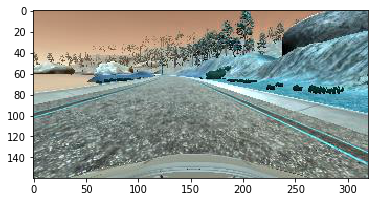

In [2]:
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers import Flatten, Dense,Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320, 3)))
model.add(Cropping2D(cropping=((70,25), (0,0))))
model.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation='relu'))
model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='relu'))
model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))

model.add(Flatten())
model.add(Dense(1164))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5)
model.save('model.h5')


Using TensorFlow backend.
/home/bibagimon/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 40041 samples, validate on 10011 samples
Epoch 1/5
   64/40041 [..............................] - ETA: 124614s - loss: 0.5413

/home/bibagimon/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/callbacks.py:119: UserWarning: Method on_batch_end() is slow compared to the batch update (0.890105). Check your callbacks.
  % delta_t_median)


40041/40041 [==============================] - 1264s - loss: 0.0884 - val_loss: 0.1419
Epoch 2/5
40041/40041 [==============================] - 518s - loss: 0.0701 - val_loss: 0.1318
Epoch 3/5
40041/40041 [==============================] - 949s - loss: 0.0609 - val_loss: 0.1377
Epoch 4/5
40041/40041 [==============================] - 1541s - loss: 0.0565 - val_loss: 0.1400
Epoch 5/5
40041/40041 [==============================] - 1235s - loss: 0.0520 - val_loss: 0.1375
